
... ***CURRENTLY UNDER DEVELOPMENT*** ...


## RBFs validation of historical data

inputs required: 
  * Historical nearshore hourly waves
  * AWAC ROI buoy data

in this notebook:
  * Validation: AWAC - Reconstruction comparison 
  

In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

# common
import os
import os.path as op

# DEV: override installed teslakit
import sys
sys.path.insert(0, op.join(os.path.abspath(''), '..', '..', '..'))

# teslakit
from teslakit.database import Database
from teslakit.plotting.buoy import scatter_QQ, compare_series



## Database and Site parameters

In [2]:
# --------------------------------------
# Teslakit database

p_data = r'/Users/nico/Projects/TESLA-kit/TeslaKit/data'
db = Database(p_data)

# set site
db.SetSite('ROI')


In [3]:
# --------------------------------------
# Load nearshore reconstructed hourly waves for buoy comparison 

# Historical
HIST_N_h = db.Load_HIST_NEARSHORE(decode_times=True)
HIST_N_h['time'] = HIST_N_h.indexes['time'].to_datetimeindex()  # need to use numpy.datetime64

# Load Buoy variables time series
AWAC = db.Load_AWAC_buoy()

# interpolate waves reconstructed data to buoy times dates
H_interp = HIST_N_h.interp(time=AWAC.time.values[:]) 



## Methodology Validation: AWAC buoy comparison

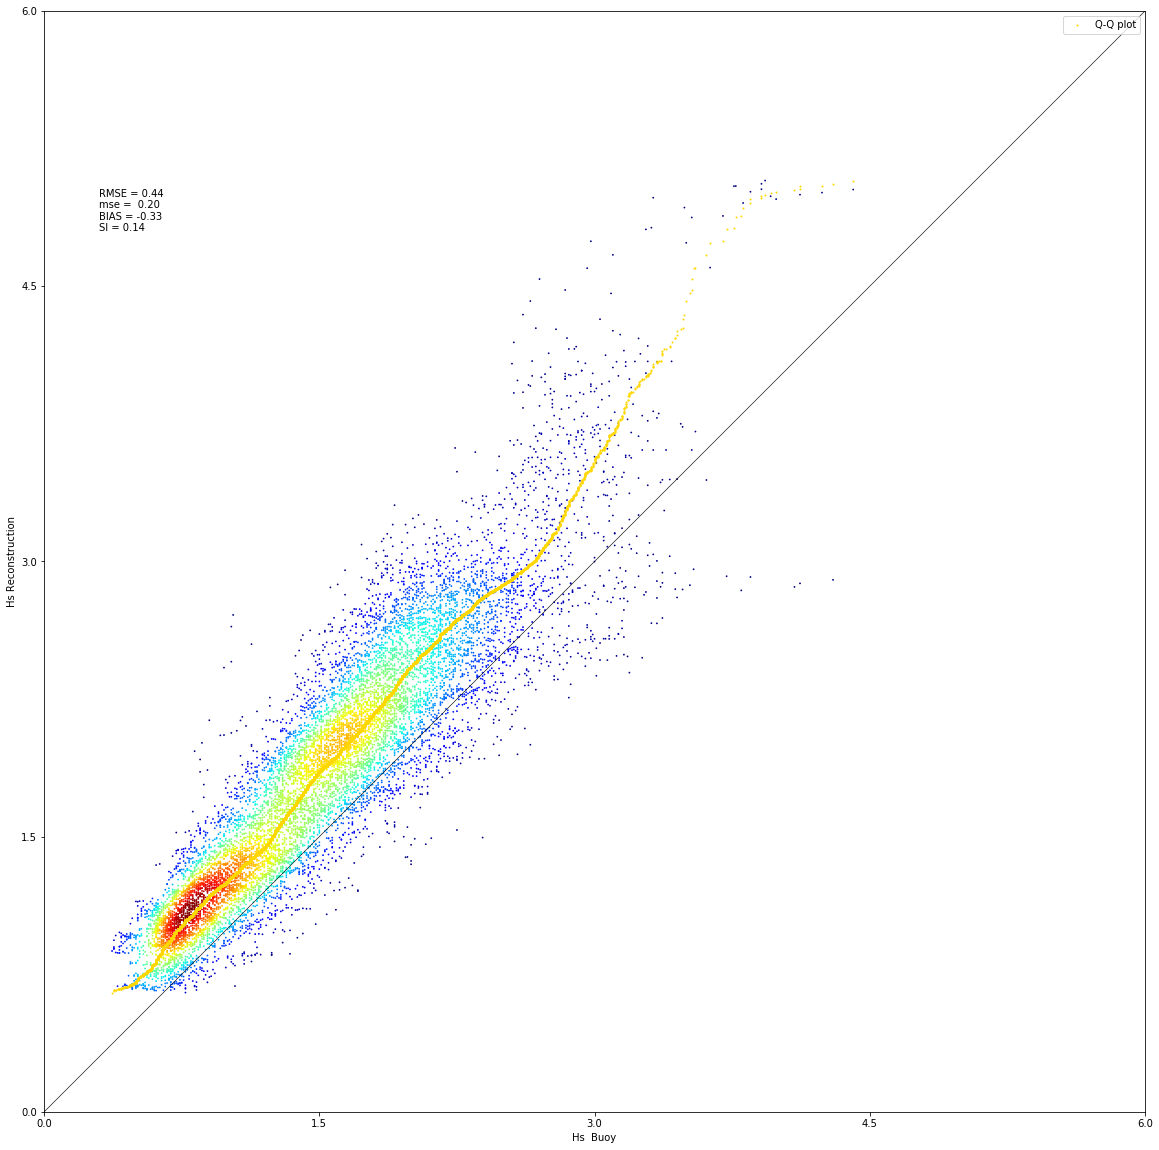

In [4]:
# scatter comparison
scatter_QQ(AWAC, H_interp, 'Hs', ' Buoy', 'Reconstruction')


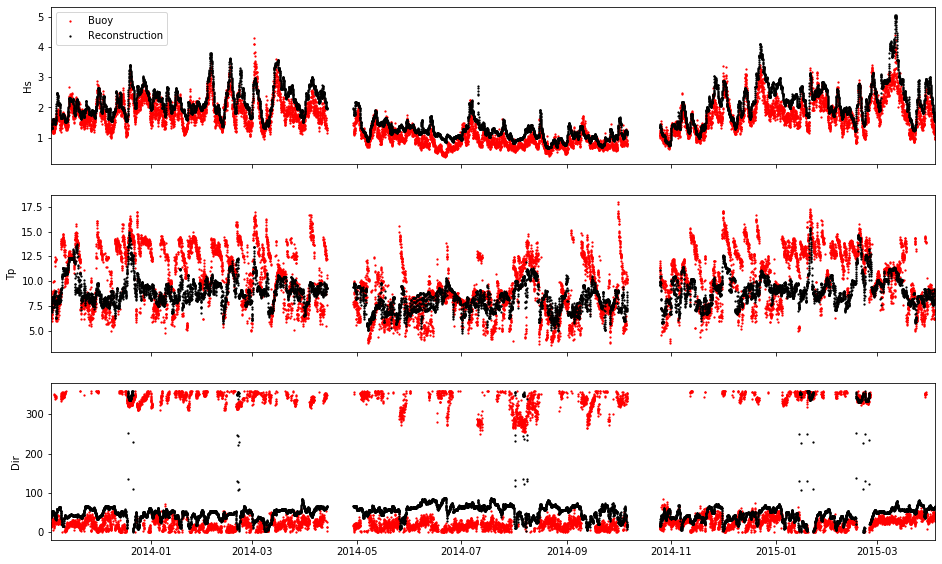

In [5]:
# series comparison
compare_series(AWAC, H_interp, ['Hs', 'Tp', 'Dir'], 'Buoy', 'Reconstruction')